# BAIT - Baseline Assessment of 
Analysing how teams attempt to disguise and mislead defenses, based on their set-up.

Note, you must run the `run_pass_prediction_model.ipynb` notebook first to obtain the `test_set_play_type_predicitons.csv` file, which this notebook uses.

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import urllib.request
import os

# Collect NFL logos for use in plotting
Due to a version issue with the `nfl_data_py` package, I have manually uploaded the CSV containing the link to team logos for each NFL team. 

[Code is borrowed from this repository to download logos for use in plotting.](https://github.com/tbryan2/NFL-Python-Team-Logo-Viz)

In [2]:
# logos = pd.read_csv("../../images/nfl_team_logos.csv")

# # Initialize an empty list for the logo file paths
# logo_paths = []

# # Initialize an empty list for the team abbreviations
# team_abbr = []

# # Create a folder for the image files if it doesn't exist

# if not os.path.exists("../../images/logos"):
#     os.makedirs("../../images/logos")

# # Pull the team logos from the URL and save them in the logos folder, save the file paths to
# for team in range(len(logos)):
#     urllib.request.urlretrieve(logos['team_logo_espn'][team], f"../../images/logos/{logos['team_abbr'][team]}.png")
#     logo_paths.append(f"../../images/logos/{logos['team_abbr'][team]}.png")
#     team_abbr.append(logos['team_abbr'][team])

# # Add the file paths to the logos dataframe
# logos["logo_file_path"] = "../../images/logos/" + logos["team_abbr"] + ".png"

logos = pd.read_csv("../../images/nfl_team_logos.csv")
logos.head()

Unnamed: 0 team_abbr          team_name  team_id  team_nick team_conf  \
0           0       ARI  Arizona Cardinals     3800  Cardinals       NFC   
1           1       ATL    Atlanta Falcons      200    Falcons       NFC   
2           2       BAL   Baltimore Ravens      325     Ravens       AFC   
3           3       BUF      Buffalo Bills      610      Bills       AFC   
4           4       CAR  Carolina Panthers      750   Panthers       NFC   

  team_division team_color team_color2 team_color3 team_color4  \
0      NFC West    #97233F     #000000     #ffb612     #a5acaf   
1     NFC South    #A71930     #000000     #a5acaf     #a30d2d   
2     AFC North    #241773     #9E7C0C     #9e7c0c     #c60c30   
3      AFC East    #00338D     #C60C30     #0c2e82     #d50a0a   
4     NFC South    #0085CA     #000000     #bfc0bf     #0085ca   

                                 team_logo_wikipedia  \
0  https://upload.wikimedia.org/wikipedia/en/thum...   
1  https://upload.wikimedia.org/wikipedia/en/thum...   
2  https://upload.wikimedia.org/wikipedia/en/thum...   
3  https://upload.wikimedia.org/wikipedia/en/thum...   
4  https://upload.wikimedia.org/wikipedia/en/thum...   

                                      team_logo_espn  \
0  https://a.espncdn.com/i/teamlogos/nfl/500/ari.png   
1  https://a.espncdn.com/i/teamlogos/nfl/500/atl.png   
2  https://a.espncdn.com/i/teamlogos/nfl/500/bal.png   
3  https://a.espncdn.com/i/teamlogos/nfl/500/buf.png   
4  https://a.espncdn.com/i/teamlogos/nfl/500-dark...   

                                       team_wordmark  \
0  https://github.com/nflverse/nflverse-pbp/raw/m...   
1  https://github.com/nflverse/nflverse-pbp/raw/m...   
2  https://github.com/nflverse/nflverse-pbp/raw/m...   
3  https://github.com/nflverse/nflverse-pbp/raw/m...   
4  https://github.com/nflverse/nflverse-pbp/raw/m...   

                                team_conference_logo  \
0  https://github.com/nflverse/nflverse-pbp/raw/m...   
1  https://github.com/nflverse/nflverse-pbp/raw/m...   
2  https://github.com/nflverse/nflverse-pbp/raw/m...   
3  https://github.com/nflverse/nflverse-pbp/raw/m...   
4  https://github.com/nflverse/nflverse-pbp/raw/m...   

                                    team_league_logo  \
0  https://raw.githubusercontent.com/nflverse/nfl...   
1  https://raw.githubusercontent.com/nflverse/nfl...   
2  https://raw.githubusercontent.com/nflverse/nfl...   
3  https://raw.githubusercontent.com/nflverse/nfl...   
4  https://raw.githubusercontent.com/nflverse/nfl...   

                                   team_logo_squared  
0  https://github.com/nflverse/nflverse-pbp/raw/m...  
1  https://github.com/nflverse/nflverse-pbp/raw/m...  
2  https://github.com/nflverse/nflverse-pbp/raw/m...  
3  https://github.com/nflverse/nflverse-pbp/raw/m...  
4  https://github.com/nflverse/nflverse-pbp/raw/m...

# Create indicators

In [3]:
play_type_predictions = pd.read_csv('test_set_play_type_predictions.csv')
play_type_predictions.head()

gameId  playId  quarter  down  logYardsToGo  distanceToEndzone  \
0  2022102302    2655        3     1      2.302585                 79   
1  2022103004    3146        4     3      2.484907                 80   
2  2022110610     348        1     2      2.302585                 23   
3  2022102700    2799        3     2      2.079442                 27   
4  2022110605    3861        4     1      2.302585                 60   

   scoreDifference  gameSecondsRemaining  offense_x_centroid  \
0               18                  1014           29.221818   
1              -14                   120           28.024545   
2                0                  3268           84.985455   
3                0                  1036           80.576364   
4              -23                    29           47.868182   

   offense_x_rel_centroid  ...  playHadMotionAndCameSet  \
0               -1.358182  ...                    False   
1               -1.785454  ...                     True   
2               -1.784546  ...                    False   
3               -2.243636  ...                    False   
4               -1.611818  ...                    False   

   playHadPlayersInMotionAtSnap  playHadPreSnapMotion  game_state_only_prob  \
0                         False                 False              0.421760   
1                         False                  True              0.972673   
2                         False                 False              0.617190   
3                          True                  True              0.700879   
4                         False                 False              0.934691   

   spatial_line_set_prob  spatial_ball_snap_prob  combined_line_set_prob  \
0               0.875775                0.966138                0.868489   
1               0.727244                0.941106                0.662838   
2               0.941180                0.898290                0.935905   
3               0.250731                0.231155                0.373693   
4               0.860648                0.742743                0.939516   

   combined_ball_snap_prob  change_in_spatial_prob  change_in_combined_prob  
0                 0.954371                0.090363                 0.085882  
1                 0.982003                0.213862                 0.319165  
2                 0.907400               -0.042889                -0.028505  
3                 0.310816               -0.019575                -0.062877  
4                 0.838128               -0.117905                -0.101389  

[5 rows x 73 columns]

In [4]:
# Add useful indicators
play_type_predictions["over_5_percent_change"] = np.where(abs(play_type_predictions["change_in_combined_prob"]) > 0.05, 1, 0)
play_type_predictions["over_10_percent_change"] = np.where(abs(play_type_predictions["change_in_combined_prob"]) > 0.1, 1, 0)
play_type_predictions["over_20_percent_change"] = np.where(abs(play_type_predictions["change_in_combined_prob"]) > 0.2, 1, 0)

play_type_predictions["pass_prob_increased_by_10_percent"] = np.where(play_type_predictions["change_in_combined_prob"] > 0.1, 1, 0)
play_type_predictions["run_prob_increased_by_10_percent"] = np.where(play_type_predictions["change_in_combined_prob"] < -0.1, 1, 0)
play_type_predictions["significant_prob_change"] = np.where(abs(play_type_predictions["change_in_combined_prob"]) > 0.1, 1, 0)

play_type_predictions["play_probability_change_category"] = np.where(play_type_predictions["change_in_combined_prob"] > 0.1, "pass_prob_increased_by_10_percent", np.where(play_type_predictions["change_in_combined_prob"] < -0.1, "run_prob_increased_by_10_percent", "no_significant_change"))

play_type_predictions["is_bait_play"] = np.where((play_type_predictions["play_probability_change_category"] == "pass_prob_increased_by_10_percent") & (play_type_predictions["playType"] == "run"), 
                                                   1,
                                                   np.where((play_type_predictions["play_probability_change_category"] == "run_prob_increased_by_10_percent") & (play_type_predictions["playType"] == "pass"), 1, 0))


In [5]:
play_type_predictions[play_type_predictions["is_bait_play"] == 1].sort_values("change_in_combined_prob", ascending=True).head() 

gameId  playId  quarter  down  logYardsToGo  distanceToEndzone  \
2102  2022103001    2623        3     1      2.302585                 25   
2023  2022103001    3039        4     3      1.945910                 47   
3089  2022110607     987        2     1      2.302585                 79   
1309  2022103003     951        1     1      2.302585                 75   
2025  2022102303    2646        4     2      1.609438                 18   

      scoreDifference  gameSecondsRemaining  offense_x_centroid  \
2102                1                  1011           83.102727   
2023                0                   580           60.740909   
3089                7                  2391           29.175455   
1309                7                  2750           32.971818   
2025               -4                   783           89.731818   

      offense_x_rel_centroid  ...  change_in_spatial_prob  \
2102               -1.797274  ...               -0.548911   
2023               -2.399090  ...               -0.482123   
3089               -1.704543  ...               -0.589938   
1309               -1.718180  ...               -0.568784   
2025               -2.008182  ...               -0.341797   

      change_in_combined_prob  over_5_percent_change  over_10_percent_change  \
2102                -0.588667                      1                       1   
2023                -0.576288                      1                       1   
3089                -0.566412                      1                       1   
1309                -0.531978                      1                       1   
2025                -0.514463                      1                       1   

      over_20_percent_change  pass_prob_increased_by_10_percent  \
2102                       1                                  0   
2023                       1                                  0   
3089                       1                                  0   
1309                       1                                  0   
2025                       1                                  0   

      run_prob_increased_by_10_percent  significant_prob_change  \
2102                                 1                        1   
2023                                 1                        1   
3089                                 1                        1   
1309                                 1                        1   
2025                                 1                        1   

      play_probability_change_category  is_bait_play  
2102  run_prob_increased_by_10_percent             1  
2023  run_prob_increased_by_10_percent             1  
3089  run_prob_increased_by_10_percent             1  
1309  run_prob_increased_by_10_percent             1  
2025  run_prob_increased_by_10_percent             1  

[5 rows x 81 columns]

In [72]:
# Average probability at line_snap vs average probability at ball_snap
team_average_probability = play_type_predictions.\
    groupby(["possessionTeam"]).\
    agg(count=("is_bait_play", "count"),
        average_line_set_pass_prob=("combined_line_set_prob", "mean"),
        average_ball_snap_pass_prob=("combined_ball_snap_prob", "mean"),
        average_increase_in_pass_prob=("change_in_combined_prob", "mean"),
        actual_pass_rate=("isPass", "mean")).\
    reset_index(drop=False).\
    merge(logos, left_on="possessionTeam", right_on="team_abbr", how="left")

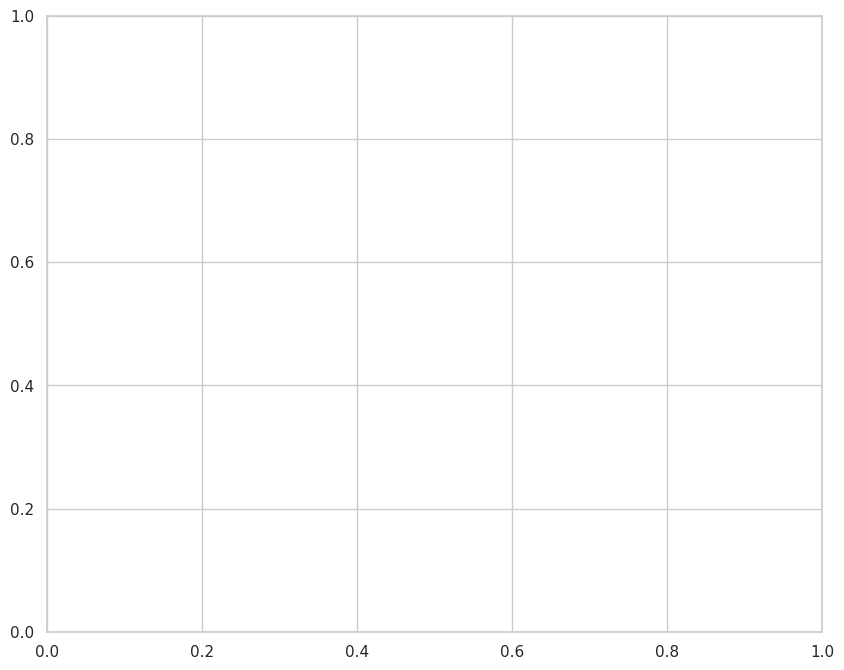

In [77]:
# Create function to do plotting with logos
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(10, 8))
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image

# def add_image(image_path, x0, y0, target_size=(30, 30)):  # specify target size in pixels
#     # Open and resize image with PIL
#     img = Image.open(image_path)
#     # Use high-quality downsampling
#     img = img.resize(target_size, Image.Resampling.LANCZOS)
#     # Convert to numpy array
#     img_array = np.array(img)
    
#     # Use OffsetImage without zoom (or zoom=1)
#     im = OffsetImage(img_array)
#     ab = AnnotationBbox(im, (x0, y0), frameon=False)
#     ax.add_artist(ab)

def add_image(image_path, x0, y0, fixed_size=(40, 40)):  # specify desired size in pixels
    # Load and resize image
    img = Image.open(image_path)
    img = img.resize(fixed_size, Image.Resampling.LANCZOS)  # LANCZOS provides good quality
    img_array = np.array(img)
    
    # Create annotation without zoom parameter
    im = OffsetImage(img_array)
    ab = AnnotationBbox(im, (x0, y0), frameon=False)
    ax.add_artist(ab)

In [80]:
fig, ax = plt.subplots(figsize=(10, 8), dpi=2000)
sns.scatterplot(data=team_average_probability, x="average_increase_in_pass_prob", y="actual_pass_rate", alpha=0)

# Add images at each data point
for x_coord, y_coord, image_path in zip(team_average_probability["average_increase_in_pass_prob"], team_average_probability["actual_pass_rate"], team_average_probability["logo_file_path"]):
    add_image(image_path, x_coord, y_coord)

plt.xlabel('Average pre-snap increase in pass probability')
plt.ylabel('Pass rate')
plt.title('Which teams change their pre-snap pass probability the most?')

plt.show()

What percentage of plays are bait plays?

In [81]:
play_type_predictions.groupby("is_bait_play").\
    agg(count=("is_bait_play", "count"),
        avg_epa=("expectedPointsAdded", "mean"),
        median_epa=("expectedPointsAdded", "median"))

count   avg_epa  median_epa
is_bait_play                             
0              4434 -0.027817   -0.181301
1               458  0.041693   -0.158375

In [132]:
play_type_predictions.groupby(["significant_prob_change", "is_bait_play"]).\
    agg(count=("significant_prob_change", "count"),
        avg_epa=("expectedPointsAdded", "mean"),
        median_epa=("expectedPointsAdded", "median"))

count   avg_epa  median_epa
significant_prob_change is_bait_play                             
0                       0              3472 -0.034558   -0.171993
1                       0               962 -0.003487   -0.203207
                        1               458  0.041693   -0.158375

In [131]:
play_type_predictions.groupby(["playType", "significant_prob_change", "is_bait_play"]).\
    agg(count=("significant_prob_change", "count"),
        avg_epa=("expectedPointsAdded", "mean"),
        median_epa=("expectedPointsAdded", "median"))

count   avg_epa  median_epa
playType significant_prob_change is_bait_play                             
pass     0                       0              2100 -0.030654   -0.212910
         1                       0               546  0.046072   -0.195891
                                 1               272  0.038286   -0.172289
run      0                       0              1372 -0.040533   -0.133323
         1                       0               416 -0.068533   -0.209401
                                 1               186  0.046676   -0.132508

In [118]:
# BAIT rate by quarter
bait_rate_by_quarter = play_type_predictions.groupby("quarter").\
    agg(count=("is_bait_play", "count"),
        bait_rate=("is_bait_play", "mean"))

epa_of_bait_plays_by_quarter = play_type_predictions.groupby([ "quarter", "is_bait_play"]).\
    agg(play_count=("is_bait_play", "count"),
        avg_epa=("expectedPointsAdded", "mean"),
        median_epa=("expectedPointsAdded", "median"))



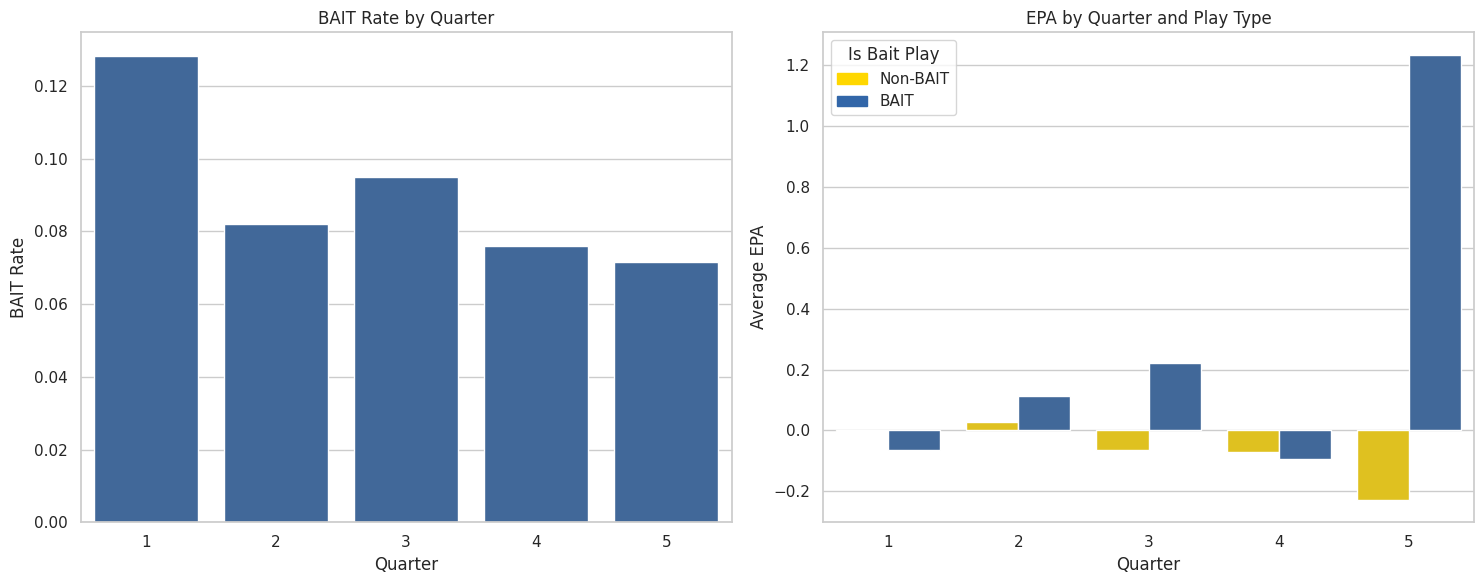

In [125]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot bait rate on left subplot
sns.barplot(data=bait_rate_by_quarter.reset_index(), 
            x='quarter', 
            y='bait_rate', 
            ax=ax1,
            color='#3266a8')
ax1.set_title('BAIT Rate by Quarter')
ax1.set_ylabel('BAIT Rate')
ax1.set_xlabel('Quarter')

# EPA plot on right subplot
epa_data = epa_of_bait_plays_by_quarter.reset_index()
sns.barplot(data=epa_data, 
            x='quarter', 
            y='avg_epa',
            hue='is_bait_play',  
            ax=ax2,
            palette=['gold', '#3266a8'])

# Update legend with correct colors
handles = [plt.Rectangle((0,0),1,1, color='gold'), 
          plt.Rectangle((0,0),1,1, color='#3266a8')]
ax2.legend(handles, ['Non-BAIT', 'BAIT'], title='Is Bait Play')

ax2.set_title('EPA by Quarter and BAIT Type')
ax2.set_ylabel('Average EPA')
ax2.set_xlabel('Quarter')

plt.tight_layout()
plt.show()

In [126]:
# BAIT rate by down
bait_rate_by_down = play_type_predictions.groupby("down").\
    agg(count=("is_bait_play", "count"),
        bait_rate=("is_bait_play", "mean"))

epa_of_bait_plays_by_down = play_type_predictions.groupby([ "down", "is_bait_play"]).\
    agg(play_count=("is_bait_play", "count"),
        avg_epa=("expectedPointsAdded", "mean"),
        median_epa=("expectedPointsAdded", "median"))



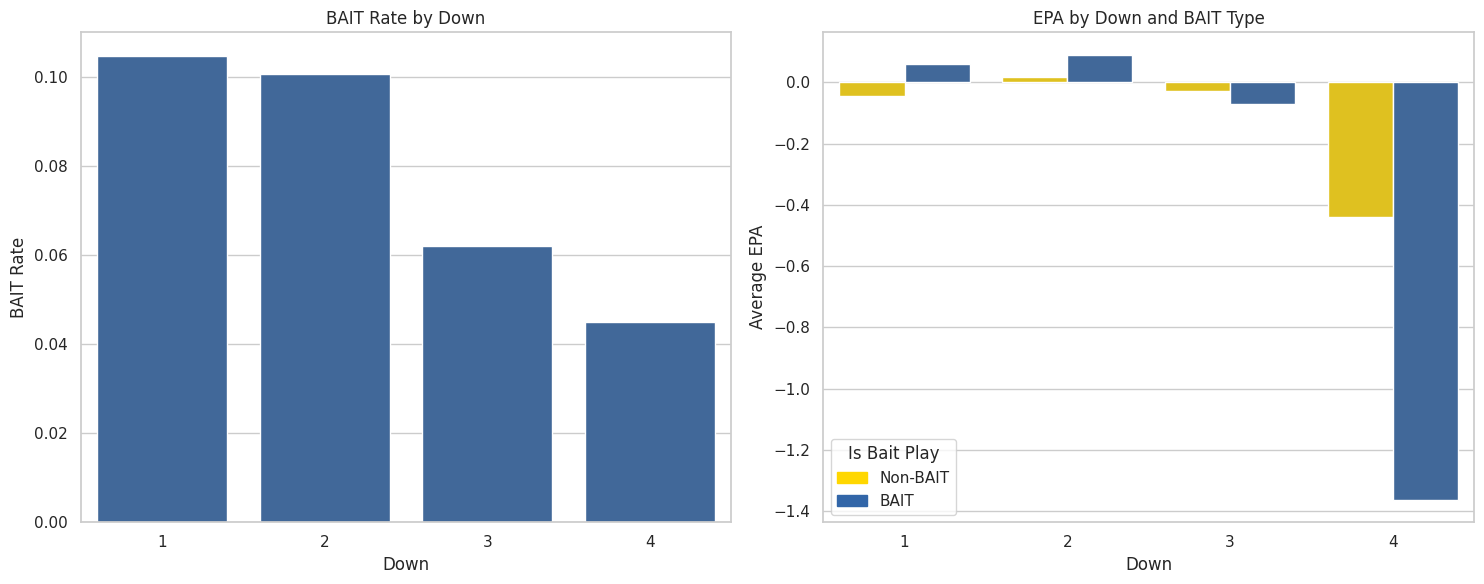

In [127]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot bait rate on left subplot
sns.barplot(data=bait_rate_by_down.reset_index(), 
            x='down', 
            y='bait_rate', 
            ax=ax1,
            color='#3266a8')
ax1.set_title('BAIT Rate by Down')
ax1.set_ylabel('BAIT Rate')
ax1.set_xlabel('Down')

# EPA plot on right subplot
epa_data = epa_of_bait_plays_by_down.reset_index()
sns.barplot(data=epa_data, 
            x='down', 
            y='avg_epa',
            hue='is_bait_play',  
            ax=ax2,
            palette=['gold', '#3266a8'])

# Update legend with correct colors
handles = [plt.Rectangle((0,0),1,1, color='gold'), 
          plt.Rectangle((0,0),1,1, color='#3266a8')]
ax2.legend(handles, ['Non-BAIT', 'BAIT'], title='Is Bait Play')

ax2.set_title('EPA by Down and BAIT Type')
ax2.set_ylabel('Average EPA')
ax2.set_xlabel('Down')

plt.tight_layout()
plt.show()

In [128]:
# BAIT rate by play type
bait_rate_by_play_type = play_type_predictions.groupby("playType").\
    agg(count=("is_bait_play", "count"),
        bait_rate=("is_bait_play", "mean"))

epa_of_bait_plays_by_play_type = play_type_predictions.groupby([ "playType", "is_bait_play"]).\
    agg(play_count=("is_bait_play", "count"),
        avg_epa=("expectedPointsAdded", "mean"),
        median_epa=("expectedPointsAdded", "median"))



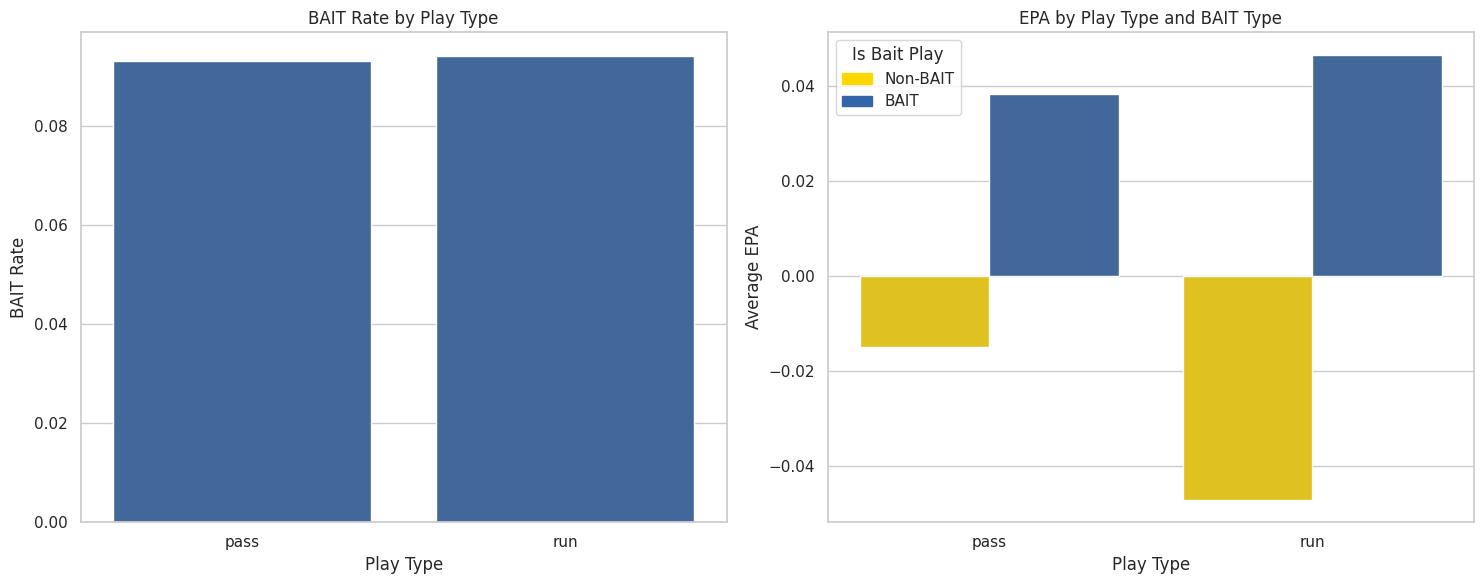

In [130]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot bait rate on left subplot
sns.barplot(data=bait_rate_by_play_type.reset_index(), 
            x='playType', 
            y='bait_rate', 
            ax=ax1,
            color='#3266a8')
ax1.set_title('BAIT Rate by Play Type')
ax1.set_ylabel('BAIT Rate')
ax1.set_xlabel('Play Type')

# EPA plot on right subplot
epa_data = epa_of_bait_plays_by_play_type.reset_index()
sns.barplot(data=epa_data, 
            x='playType', 
            y='avg_epa',
            hue='is_bait_play',  
            ax=ax2,
            palette=['gold', '#3266a8'])

# Update legend with correct colors
handles = [plt.Rectangle((0,0),1,1, color='gold'), 
          plt.Rectangle((0,0),1,1, color='#3266a8')]
ax2.legend(handles, ['Non-BAIT', 'BAIT'], title='Is Bait Play')

ax2.set_title('EPA by Play Type and BAIT Type')
ax2.set_ylabel('Average EPA')
ax2.set_xlabel('Play Type')

plt.tight_layout()
plt.show()

In [137]:
# Bait rate by team
team_bait_rates = play_type_predictions.\
    groupby(["possessionTeam"]).\
    agg(play_count=("is_bait_play", "count"),
        bait_rate=("is_bait_play", "mean")).\
    reset_index(drop=False).\
    merge(logos, left_on="possessionTeam", right_on="team_abbr", how="left")

bait_rate_epa = play_type_predictions[play_type_predictions["is_bait_play"] == 1].\
    groupby(["possessionTeam"]).\
    agg(bait_epa=("expectedPointsAdded", "mean")).\
    reset_index(drop=False)

team_bait_rates_with_epa = team_bait_rates.\
    merge(bait_rate_epa, left_on="possessionTeam", right_on="possessionTeam", how="left")


In [138]:
team_bait_rates_with_epa

possessionTeam  play_count  bait_rate  Unnamed: 0 team_abbr  \
0             ARI         175   0.102857           0       ARI   
1             ATL         161   0.142857           1       ATL   
2             BAL         193   0.098446           2       BAL   
3             BUF          99   0.060606           3       BUF   
4             CAR         164   0.164634           4       CAR   
5             CHI         194   0.087629           5       CHI   
6             CIN         171   0.093567           6       CIN   
7             CLE         119   0.075630           7       CLE   
8             DAL         110   0.063636           8       DAL   
9             DEN         131   0.068702           9       DEN   
10            DET         161   0.074534          10       DET   
11             GB         169   0.076923          11        GB   
12            HOU         153   0.104575          12       HOU   
13            IND         170   0.064706          13       IND   
14            JAX         183   0.076503          14       JAX   
15             KC         147   0.074830          15        KC   
16             LA         106   0.141509          16        LA   
17            LAC         125   0.112000          17       LAC   
18             LV         160   0.112500          19        LV   
19            MIA         164   0.121951          20       MIA   
20            MIN         124   0.064516          21       MIN   
21             NE         174   0.097701          22        NE   
22             NO         177   0.067797          23        NO   
23            NYG         126   0.111111          24       NYG   
24            NYJ         160   0.112500          25       NYJ   
25            PHI         111   0.135135          27       PHI   
26            PIT         130   0.046154          28       PIT   
27            SEA         181   0.093923          30       SEA   
28             SF         117   0.136752          31        SF   
29             TB         195   0.066667          33        TB   
30            TEN         155   0.070968          34       TEN   
31            WAS         187   0.085561          35       WAS   

                team_name  team_id   team_nick team_conf team_division  ...  \
0       Arizona Cardinals     3800   Cardinals       NFC      NFC West  ...   
1         Atlanta Falcons      200     Falcons       NFC     NFC South  ...   
2        Baltimore Ravens      325      Ravens       AFC     AFC North  ...   
3           Buffalo Bills      610       Bills       AFC      AFC East  ...   
4       Carolina Panthers      750    Panthers       NFC     NFC South  ...   
5           Chicago Bears      810       Bears       NFC     NFC North  ...   
6      Cincinnati Bengals      920     Bengals       AFC     AFC North  ...   
7        Cleveland Browns     1050      Browns       AFC     AFC North  ...   
8          Dallas Cowboys     1200     Cowboys       NFC      NFC East  ...   
9          Denver Broncos     1400     Broncos       AFC      AFC West  ...   
10          Detroit Lions     1540       Lions       NFC     NFC North  ...   
11      Green Bay Packers     1800     Packers       NFC     NFC North  ...   
12         Houston Texans     2120      Texans       AFC     AFC South  ...   
13     Indianapolis Colts     2200       Colts       AFC     AFC South  ...   
14   Jacksonville Jaguars     2250     Jaguars       AFC     AFC South  ...   
15     Kansas City Chiefs     2310      Chiefs       AFC      AFC West  ...   
16       Los Angeles Rams     2510        Rams       NFC      NFC West  ...   
17   Los Angeles Chargers     4400    Chargers       AFC      AFC West  ...   
18      Las Vegas Raiders     2520     Raiders       AFC      AFC West  ...   
19         Miami Dolphins     2700    Dolphins       AFC      AFC East  ...   
20      Minnesota Vikings     3000     Vikings       NFC     NFC North  ...   
21   New England Patriots     3200    Patriots       AFC      AFC East  ...   
22     

In [139]:
fig, ax = plt.subplots(figsize=(10, 8), dpi=2000)
sns.scatterplot(data=team_bait_rates_with_epa, x="bait_rate", y="bait_epa", alpha=0)

# Add images at each data point
for x_coord, y_coord, image_path in zip(team_bait_rates_with_epa["bait_rate"], team_bait_rates_with_epa["bait_epa"], team_bait_rates_with_epa["logo_file_path"]):
    add_image(image_path, x_coord, y_coord)

plt.xlabel('BAIT Rate')
plt.ylabel('BAIT EPA')
plt.title('Which teams are most effective at the BAIT play?')

plt.show()

In [140]:
team_bait_rates.sort_values("bait_rate", ascending=False).head(10)

possessionTeam  play_count  bait_rate  Unnamed: 0 team_abbr  \
4             CAR         164   0.164634           4       CAR   
1             ATL         161   0.142857           1       ATL   
16             LA         106   0.141509          16        LA   
28             SF         117   0.136752          31        SF   
25            PHI         111   0.135135          27       PHI   
19            MIA         164   0.121951          20       MIA   
24            NYJ         160   0.112500          25       NYJ   
18             LV         160   0.112500          19        LV   
17            LAC         125   0.112000          17       LAC   
23            NYG         126   0.111111          24       NYG   

               team_name  team_id team_nick team_conf team_division  ...  \
4      Carolina Panthers      750  Panthers       NFC     NFC South  ...   
1        Atlanta Falcons      200   Falcons       NFC     NFC South  ...   
16      Los Angeles Rams     2510      Rams       NFC      NFC West  ...   
28   San Francisco 49ers     4500     49ers       NFC      NFC West  ...   
25   Philadelphia Eagles     3700    Eagles       NFC      NFC East  ...   
19        Miami Dolphins     2700  Dolphins       AFC      AFC East  ...   
24         New York Jets     3430      Jets       AFC      AFC East  ...   
18     Las Vegas Raiders     2520   Raiders       AFC      AFC West  ...   
17  Los Angeles Chargers     4400  Chargers       AFC      AFC West  ...   
23       New York Giants     3410    Giants       NFC      NFC East  ...   

   team_color2 team_color3 team_color4  \
4      #000000     #bfc0bf     #0085ca   
1      #000000     #a5acaf     #a30d2d   
16     #FFD100     #001532     #af925d   
28     #B3995D     #000000     #a5acaf   
25     #A5ACAF     #acc0c6     #000000   
19     #F58220     #005778     #008e97   
24     #000000         NaN         NaN   
18     #A5ACAF     #a6aeb0     #000000   
17     #ffc20e     #ffb612     #001532   
23     #A71930     #a5acaf     #012352   

                                  team_logo_wikipedia  \
4   https://upload.wikimedia.org/wikipedia/en/thum...   
1   https://upload.wikimedia.org/wikipedia/en/thum...   
16  https://upload.wikimedia.org/wikipedia/en/thum...   
28  https://upload.wikimedia.org/wikipedia/commons...   
25  https://upload.wikimedia.org/wikipedia/en/thum...   
19  https://upload.wikimedia.org/wikipedia/en/thum...   
24  https://upload.wikimedia.org/wikipedia/en/thum...   
18  https://upload.wikimedia.org/wikipedia/en/thum...   
17  https://upload.wikimedia.org/wikipedia/en/thum...   
23  https://upload.wikimedia.org/wikipedia/commons...   

                                       team_logo_espn  \
4   https://a.espncdn.com/i/teamlogos/nfl/500-dark...   
1   https://a.espncdn.com/i/teamlogos/nfl/500/atl.png   
16  https://a.espncdn.com/i/teamlogos/nfl/500/lar.png   
28   https://a.espncdn.com/i/teamlogos/nfl/500/sf.png   
25  https://a.espncdn.com/i/teamlogos/nfl/500/phi.png   
19  https://a.espncdn.com/i/teamlogos/nfl/500/mia.png   
24  https://a.espncdn.com/i/teamlogos/nfl/500/nyj.png   
18   https://a.espncdn.com/i/teamlogos/nfl/500/lv.png   
17  https://a.espncdn.com/i/teamlogos/nfl/500/lac.png   
23  https://a.espncdn.com/i/teamlogos/nfl/500/nyg.png   

                                        team_wordmark  \
4   https://github.com/nflverse/nflverse-pbp/raw/m...   
1   https://github.com/nflverse/nflverse-pbp/raw/m...   
16  https://github.com/nflverse/nflverse-pbp/raw/m...   
28  https://github.com/nflverse/nflverse-pbp/raw/m...   
25  https://github.com/nflverse/nflverse-pbp/raw/m...   
19  https://github.com/nflverse/nflverse-pbp/raw/m...   
24  https://github.com/nflverse/nflverse-pbp/raw/m...   
18  https://github.com/nflverse/nflverse-pbp/raw/m...   
17  https://github.com/nflverse/nflverse-pbp/raw/m...   
23  https://github.com/nflverse/nflverse-pbp/raw/m...   

                                 team_conference_logo  \
4   https://github.com/nflverse/nfl